### Read and explore the datasets

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quilt
import seaborn as sns
import missingno as msno
import plotly.offline
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
import cufflinks
import geopandas as gp
#init_notebook_mode

# pip install cufflinks
# pip install plotly_express
# cufflinks.__version__
# pip install cufflinks --upgrade
# pip install python-quilt
# pip install missingno

In [32]:
#Read datasets, no description available. ALl files available at 
# http://www.tsb.gc.ca/eng/stats/aviation/data-5.html. Adding conditions as warning
# received: Columns (+30 in total)have mixed types. Specify dtype option on 
# import or set low_memory=False.


df1 = pd.read_csv('ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv') 
#                   sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df2 = pd.read_csv('ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv')
#                  sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df3 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
#df4 = pd.read_csv('ASISdb_MDOTW_VW_SURVIVABILITY_PUBLIC.csv')
dfo = pd.read_csv('23100018.csv')

In [33]:
#Rename occid
df2 = df2.rename(index=str, columns={"occid": "OccID"})

In [34]:
df2.shape

(57227, 194)

In [35]:
df1.shape

(47226, 246)

In [36]:
df1.head()

,OccID,OccNo,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,InitialPositionEnum_DisplayFre,FinalPositionEnum,FinalPositionEnum_DisplayEng,FinalPositionEnum_DisplayFre,FullProcedureIND,FullProcedureIND_DisplayEng,FullProcedureIND_DisplayFre,SurfaceContaminationID,SurfaceContaminationID_DisplayEng,SurfaceContaminationID_DisplayFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,152826,A19P0070,109.0,(CAMPBELL ISLAND),2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152825,A19P0069,1912.0,Vancouver Intl,2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df3.shape

(105506, 14)

### Finding unique values on datasets

In [38]:
df1u = df1.OccID.nunique()

In [39]:
df2u = df2.OccID.nunique()

In [40]:
df3u = df3.OccID.nunique()

In [41]:
unique_ = pd.DataFrame({'Dataset' :["AC","EVE", "PHA"],#"OCC","SUR"], 
                        "Unique":[df1u,df2u, df3u]})
unique_.sort_values(by="Unique", ascending=False)

,Dataset,Unique
0,AC,43855
1,EVE,43854
2,PHA,43814


### Merging the three datasets with accidents information

In [42]:
# dfm = df1.merge(df2, how='left', left_on=('OccID'), right_on=('OccID'))
# .merge(df3, how='left', left_on=('OccID'), right_on=('OccID')) 

In [43]:
from functools import reduce
dfs = [df1,df2,df3]
dfm = reduce(lambda left,right: pd.merge(left,right, on='OccID'), dfs)

In [44]:
dfm #dfm.TotalFatalCount

,OccID,OccNo_x,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,EventPhaseSequence,EventID_DisplayEng,EventID_DisplayFre,FullEventDescEng,FullEventDescFre,PhaseID,PhaseID_DisplayEng,PhaseID_DisplayFre,FullPhaseDescEng,FullPhaseDescFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,1,Flight crew incapacitation/illness/medical issue,Maladie/Incapacité de l'équipage de conduite,[Aircraft operation general].[Flight crew].[Fl...,[Exploitation de l'aéronef - général].[Équipag...,184.0,Cruise,Croisière,[POWERED FIXED-WING AIRCRAFT].[En-route].[Cruise],[Aéronef à voilure fixe - motorisé].[En route]...
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,1,Smoke - Passenger cabin,Fumée - Cabine passagers,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
2,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,2,Smoke - Cockpit,Fumée - Poste de pilotage,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
3,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,3,Smoke - APU,Fumée - APU,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
4,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,4,Declared Emergency/Priority/ARFF Standby,Déclaration d'une urgence,[Consequential events].[Declared Emergency/Pri...,"[Evénements résultants, conséquences].[Déclara...",211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
5,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,1,Smoke - Passenger cabin,Fumée - Cabine passagers,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
6,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,2,Smoke - Cockpit,Fumée - Poste de pilotage,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
7,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,3,Smoke - APU,Fumée - APU,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
8,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,4,Declared Emergency/Priority/ARFF Standby,Déclaration d'une urgence,[Consequential events].[Declared Emergency/Pri...,"[Evénements résultants, conséquences].[Déclara...",211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
9,152826,A19P0070,109.0,(CAMPBELL ISLAND),2.0,CANADA

### Preprocessing dataset with information about movements

In [45]:
dfo.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Class of operation',
       'Rank and number of movements', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

In [46]:
tot = dfo.groupby(['GEO', 'Class of operation', 'REF_DATE'])

In [47]:
tot.first()

DGUID  \
GEO                          Class of operation                   REF_DATE                
Abbotsford, British Columbia Itinerant movements                  1997              NaN   
                                                                  1998              NaN   
                                                                  1999              NaN   
                                                                  2000              NaN   
                                                                  2001              NaN   
                                                                  2002              NaN   
                                                                  2003              NaN   
                                                                  2004              NaN   
                                                                  2005              NaN   
                                                                  2006              NaN   
                                                                  2007              NaN   
                                                                  2008              NaN   
                                                                  2009              NaN   
                                                                  2010              NaN   
                                                                  2011              NaN   
                                                                  2012              NaN   
                                                                  2013              NaN   
                                                                  2014              NaN   
                                                                  2015              NaN   
                                                                  2016              NaN   
                                                                  2017              NaN   
                                                                  2018              NaN   
                             Local movements                      1997              NaN   
                                                                  1998              NaN   
                                                                  1999              NaN   
                                                                  2000              NaN   
                                                                  2001              NaN   
                                                                  2002              NaN   
                                                                  2003              NaN   
                                                                  2004              NaN   
...                                                                                 ...   
Yukon                        Local movements                      2011      2016A000260   
                                                                  2012      2016A000260   
                                                                  2013      2016A000260   
                                                                  2014      2016A000260   
                                                                  2015      2016A000260   
                                                                  2016      2016A000260   
                                                                  2017      2016A000260   
                                                                  2018      2016A000260   
                             Total, itinerant and local movements 1997      2016A000260   
                                                                  1998      2016A000260   
                                                                  1999      2016A000260   
                                                                  2000      20

In [48]:
# tot.get_group('Total Canadian airports')

In [49]:
dfm.shape

(181464, 452)

In [50]:
dfm.head()

,OccID,OccNo_x,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,EventPhaseSequence,EventID_DisplayEng,EventID_DisplayFre,FullEventDescEng,FullEventDescFre,PhaseID,PhaseID_DisplayEng,PhaseID_DisplayFre,FullPhaseDescEng,FullPhaseDescFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,1,Flight crew incapacitation/illness/medical issue,Maladie/Incapacité de l'équipage de conduite,[Aircraft operation general].[Flight crew].[Fl...,[Exploitation de l'aéronef - général].[Équipag...,184.0,Cruise,Croisière,[POWERED FIXED-WING AIRCRAFT].[En-route].[Cruise],[Aéronef à voilure fixe - motorisé].[En route]...
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,1,Smoke - Passenger cabin,Fumée - Cabine passagers,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
2,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,2,Smoke - Cockpit,Fumée - Poste de pilotage,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
3,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,3,Smoke - APU,Fumée - APU,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...
4,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,4,Declared Emergency/Priority/ARFF Standby,Déclaration d'une urgence,[Consequential events].[Declared Emergency/Pri...,"[Evénements résultants, conséquences].[Déclara...",211.0,Standing : Engine(s) Shut Down,Stationné - arrêt du moteur,[POWERED FIXED-WING AIRCRAFT].[Standing].[Stan...,[Aéronef à voilure fixe - motorisé].[Stationne...


In [75]:
dfm = dfm.sort_values("OccID", ascending=True)
dfm = dfm.drop_duplicates(subset ="OccID") 
#df.dropna(inplace = True)

In [76]:
#msno.matrix(dfm_)

In [77]:
dfm.shape

(43814, 452)

In [78]:
dfm.Latitude.isnull().sum() #null Lat values

1330

In [79]:
dfm.Latitude.isna().sum()

1330

In [80]:
dfm.Latitude.fillna(0, inplace=True)

In [81]:
dfm.Longitude.fillna(0, inplace=True)

#### Drop columns with more than 300 null values

In [82]:
dfp = dfm.drop(dfm.columns[dfm.apply(lambda col: col.isnull().sum() > 300)], axis=1)

In [83]:
dfp.shape

(43814, 68)

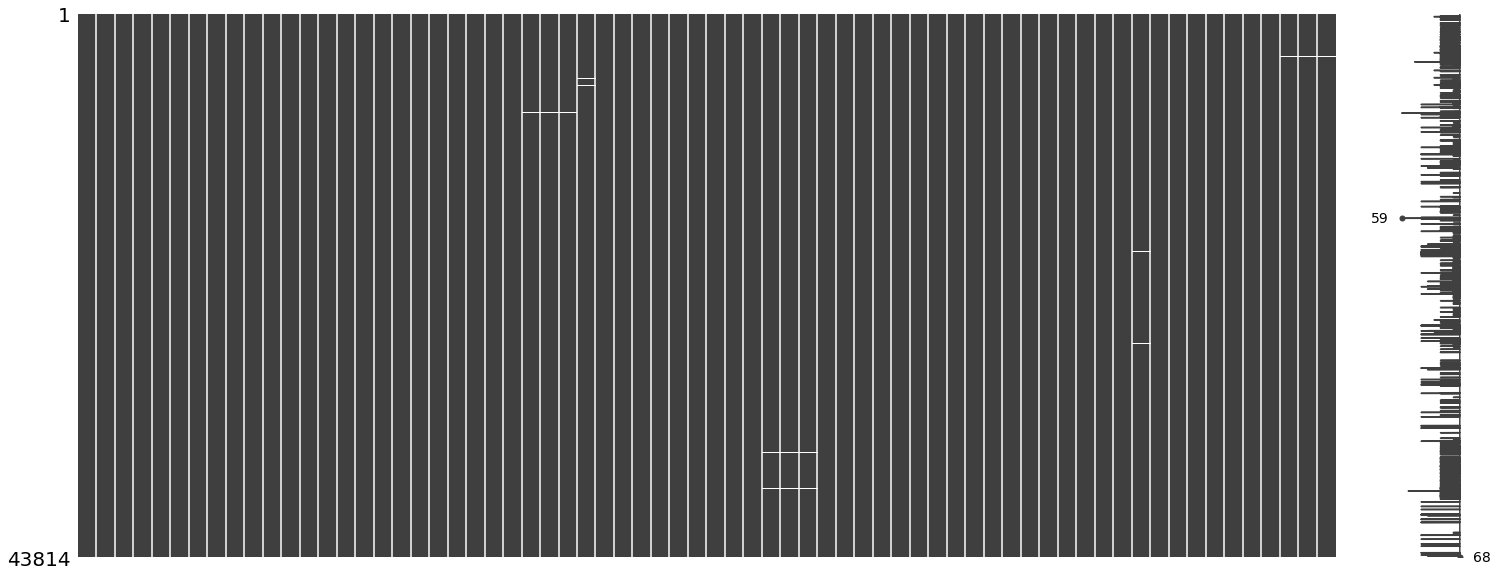

In [84]:
msno.matrix(dfp)

In [72]:
dfp.columns

Index(['OccID', 'OccNo_x', 'CountryID', 'CountryID_DisplayEng',
       'CountryID_DisplayFre', 'OccClassID', 'OccClassID_DisplayEng',
       'OccClassID_DisplayFre', 'OccDate', 'OccRegionID',
       'OccRegionID_DisplayEng', 'OccRegionID_DisplayFre', 'OccTypeID',
       'OccTypeID_DisplayEng', 'OccTypeID_DisplayFre', 'PositionTypeEnum',
       'PositionTypeEnum_DisplayEng', 'PositionTypeEnum_DisplayFre',
       'InitTSBNotifDate', 'ReportedByID', 'ReportedByID_DisplayEng',
       'ReportedByID_DisplayFre', 'RespRegionID', 'RespRegionID_DisplayEng',
       'RespRegionID_DisplayFre', 'Summary', 'TotalFatalCount',
       'TotalMinorCount', 'TotalNoneCount', 'TotalSeriousCount',
       'TotalUnknownCount', 'NoAircraftInvolved', 'InjuriesEnum',
       'InjuriesEnum_DisplayEng', 'InjuriesEnum_DisplayFre', 'OccNo_y',
       'AcID_x', 'AircraftID', 'AircraftVersion', 'RowStatus',
       'RegistrationNo', 'AircraftTypeID', 'AircraftTypeID_DisplayEng',
       'AircraftTypeID_DisplayFre', 'RegCou

In [87]:
Long = dfm.Longitude * -1

Text(0.5,1,'Lat and Longs')

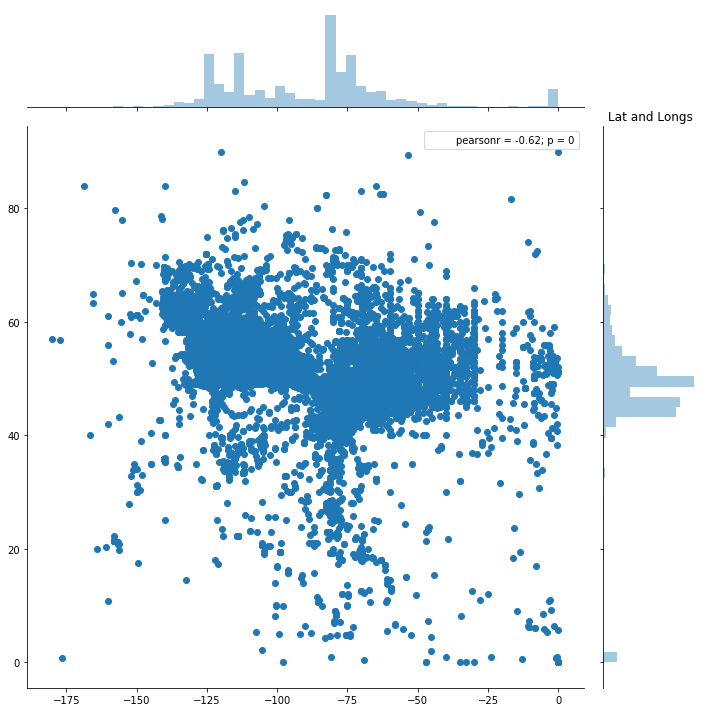

In [88]:
sns.jointplot(x=Long.values, y=dfm.Latitude.values, size = 10)
plt.title('Lat and Longs')

In [89]:
dfm.sample(5)

,OccID,OccNo_x,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,EventPhaseSequence,EventID_DisplayEng,EventID_DisplayFre,FullEventDescEng,FullEventDescFre,PhaseID,PhaseID_DisplayEng,PhaseID_DisplayFre,FullPhaseDescEng,FullPhaseDescFre
176845,48923,A79P0056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Dragged wing/pod/float,"Heurt, traînée ou éraflement voilure/rotor/nac...",[Aircraft operation general].[Aircraft handlin...,[Exploitation de l'aéronef - général].[Conduit...,194.0,Landing roll,Roulement à l'atterrissage,[POWERED FIXED-WING AIRCRAFT].[Landing].[Landi...,[Aéronef à voilure fixe - motorisé].[Atterriss...
180664,45735,A76Q0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,108.0,Run-on landing,Atterrissage glissé,[HELICOPTER].[Landing].[Run-on landing],[Hélicoptère].[Atterrissage].[Atterrissage gli...
56911,126029,A06C0105,1815.0,THE PAS,2.0,CANADA,CANADA,9.0,MANITOBA,MANITOBA,...,1,Separation provision,Assurer la séparation,[Air Navigation Services].[Separation provision],[Services de navigation aérienne].[Assurer la ...,184.0,Cruise,Croisière,[POWERED FIXED-WING AIRCRAFT].[En-route].[Cruise],[Aéronef à voilure fixe - motorisé].[En route]...
125785,78326,A94Q0060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Electrical power system,Circuit alimentation électrique,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,183.0,Climb to cruising level or altitude,Montée au niveau ou l'altitude de croisière,[POWERED FIXED-WING AIRCRAFT].[En-route].[Clim...,[Aéronef à voilure fixe - motorisé].[En route]...
21854,147709,A15O0150,1010.0,Lester B. Pearson Intl,2.0,CANADA,CANADA,336.0,ONTARIO,ONTARIO,...,1,Landing gear position and warning system,Système d'avertissement et de position du tra...,[Aircraft/system/component related event (Airc...,[Evénement aéronef/système/composant (Aéronef/...,216.0,Initial climb,Montée initiale,[POWERED FIXED-WING AIRCRAFT].[Take-off].[Init...,[Aéronef à voilure fixe - motorisé].[Décollage...


In [ ]:
# dfm_['OccDate'] = le.fit_transform(dfm_['OccDate'].astype(str))
# LabelEncoder()
# le.classes_
# dfm_['OccDate'] = pd.to_datetime(dfm_['OccDate'])

In [ ]:
g = sns.FacetGrid(dfm_,hue='OccTypeID',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'OccDate',bins=100,alpha=0.5)
plt.legend()

In [ ]:
#df = pd.to_datetime(df['OccDate'], errors='coerce')


In [ ]:
#importing plotly and cufflinks in offline mode
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#Removed as there are few occurrences before 1976
#dfm_.OccDate.dt.year.iplot(kind='histogram', bins=40, theme='white', title='Ocurrences per year')

In [92]:
# Drop prior to 1976
old = dfm[(dfm.OccDate.dt.year < 1976)].index
dfm.drop(old, inplace=True)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
dfm.OccDate.dt.year.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per year')

In [ ]:
#plt.hist(df['OccTypeID_DisplayEng']);
#sns.distplot( a=df["OccTypeID_DisplayEng"], hist=True, kde=False, rug=False )
#sns.scatter(x='OccTypeID_DisplayEng', data=df)
#px.bar(df, x='OccTypeID_DisplayEng', template='plotly_white')
#df.OccTypeID_DisplayEng.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per type')
#px.histogram(df, x='OperatorTypeID_DisplayEng', color='OccTypeID_DisplayEng',template='plotly')

In [ ]:
#px.histogram(, x='OrganizationID_DisplayEng', y='OccTypeID_DisplayEng') 
sns.distplot(["OccTypeID"])

In [ ]:
# g = sns.FacetGrid(,hue='OccTypeID_DisplayEng',palette='Set1',size=8,aspect=2)
# g = g.map(plt.hist,'TotalFatalCount', bins=20,alpha=0.5)
# plt.legend()

In [ ]:
#dfen.TotalFatalCount

In [ ]:
# dfa.corr('pearson')

In [ ]:
# sns.heatmap(dfa.isnull(), cbar=False)

In [ ]:
px.scatter(dfm, x='TotalFatalCount', y="OrganizationID_DisplayEng", 
                   size='TotalFatalCount', size_max=60)
#Get another graph for <100 fatalities

In [ ]:
plt.scatter(dfm.OccTypeID_DisplayEng, dfm.OperationTypeID_DisplayEng)
#Get another graph for <100 fatalities

### Preprocessing for classification and clustering

In [94]:
#Select relevant features, USE df=df[]!!!! Remove index for model setup
dfa = dfm[['OccID','AircraftTypeID','AircraftMakeID','OrganizationID', 'OperationTypeID',
           'OperatorTypeID', 'WeightCategoryID','YearOfManuf','NumberOfEngine', 
          'MaxTakeOffWeight','NumberOfEngine', 'OccDate', 'OccTime','Latitude','Longitude', 
           'DamageLevelID','WakeTurbulenceCategoryID', 'DangerousGoodEnum','PhaseID',
           'TotalFatalCount', 'OccTypeID']]#'DepartAirportID','DestAirportID','LandingGearID'
dfa.head()

,OccID,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,...,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,PhaseID,TotalFatalCount,OccTypeID
181463,45001,3.0,53063.0,52129.0,9.0,5.0,2.0,1969,1.0,2550.0,...,1/9/1976 12:00:00 AM,11:30:00,48.050000,54.833333,5.0,1.0,2.0,108.0,0,1
181461,45002,1.0,50371.0,51282.0,1.0,5.0,2.0,NaN,1.0,2800.0,...,1/19/1976 12:00:00 AM,13:40:00,53.566667,64.100000,5.0,1.0,2.0,218.0,0,1
181460,45003,1.0,50669.0,51373.0,3.0,5.0,1.0,1976,1.0,2150.0,...,2/13/1976 12:00:00 AM,18:30:00,51.483333,55.816667,5.0,1.0,2.0,194.0,0,1
181455,45004,1.0,50443.0,51282.0,1.0,5.0,3.0,1959,1.0,8000.0,...,2/16/1976 12:00:00 AM,10:00:00,53.500000,55.833333,2.0,2.0,2.0,194.0,1,1
181452,45005,1.0,50443.0,51282.0,1.0,5.0,2.0,1952,1.0,2313.0,...,2/25/1976 12:00:00 AM,17:09:00,53.316667,60.433333,5.0,1.0,2.0,194.0,0,1


In [ ]:
dfa.shape

In [ ]:
dfa.info()

In [ ]:
dfa.drop_duplicates(subset ="OccID", 
                     keep = False, inplace = True) 
#df.dropna(inplace = True)

In [ ]:
dfa = dfa.drop(['OccID'], axis=1)

In [ ]:
dfa.shape

In [ ]:
msno.matrix(dfa)

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
dfa.fillna(0, inplace=True)

In [ ]:
dfa

In [ ]:
#  = .replace('', np.nan)

In [ ]:
dfa.isnull().sum()


In [ ]:
# .isnan().sum()

In [ ]:
# le[fit..AircraftTypeID_DisplayEng]
# list(le.classes_)
# #le.transform(df['AircraftTypeID_DisplayEng'])

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# # ['AircraftTypeID_DisplayEng']
# # le.fit(['AircraftTypeID_DisplayEng'])
# # ['AircraftTypeID_DisplayEng'] = le.fit_transform(['AircraftTypeID_DisplayEng'].astype(str))
# # LabelEncoder()
# # le.classes_

# # array([1, 2, 6])
# #le.transform(['AircraftTypeID_DisplayEng'].astype(str)) 
# # array([0, 0, 1, 2]...)
# # le.inverse_transform([0, 0, 1, 2])
# # array([1, 1, 2, 6])

In [ ]:
# ['AircraftMakeID_DisplayEng'] = le.fit_transform(['AircraftMakeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OrganizationID_DisplayEng'] = le.fit_transform(['OrganizationID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OperatorTypeID_DisplayEng'] = le.fit_transform(['OperatorTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OperationTypeID_DisplayEng'] = le.fit_transform(['OperationTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['OccTypeID_DisplayEng'] = le.fit_transform(['OccTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
# ['YearOfManuf'] = le.fit_transform(['YearOfManuf'].astype(str))
# LabelEncoder()
# le.classes_

In [ ]:
#Finding missing values on YearofManuf
# .YearOfManuf.isnull().sum().sum()

In [ ]:
# from sklearn.impute import SimpleImputer

In [ ]:
# imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

In [ ]:
#  = imp.fit_transform(.values)

In [ ]:
dfa.head()

In [ ]:
# from sklearn_pandas import CategoricalImputer
# data = 
# imputer = CategoricalImputer()
# imputer.fit_transform(data)


In [ ]:
# #Removing timestamp from OccDate
# ['OccDate'] = pd.to_datetime(['OccDate'])


In [ ]:
dfa['YearOfManuf'] = le.fit_transform(dfa['YearOfManuf'].astype(str))
LabelEncoder()
le.classes_

In [ ]:
dfa['YearOfManuf'] = pd.to_numeric(dfa['YearOfManuf'])

In [ ]:
dfa['OccDate'] = le.fit_transform(dfa['OccDate'].astype(str))
LabelEncoder()
le.classes_

In [ ]:
#dfa['OccDate'] = pd.to_datetime(dfa['OccDate'])

In [ ]:
dfa['OccTime'] = le.fit_transform(dfa['OccTime'].astype(str))
LabelEncoder()
le.classes_

In [ ]:
#dfa['OccTime'] = pd.to_numeric(dfa['OccTime'])

In [ ]:
#Create new column with only Date
dfm['Date'] = dfm['OccDate'].dt.date

In [ ]:
# = imp.fit_transform() 

In [ ]:
dfa.info()

In [ ]:
#Inferring dtypes
#  = .infer_objects()
# .dtypes

In [ ]:
dfa.shape

In [ ]:
# print ([pd.to_numeric(.OccTypeID_DisplayEng, errors='coerce').isnull()])
# #pd.to_numeric(df['OccTypeID_DisplayEng'])

In [ ]:
# non_numeric = df.OrganizationID_DisplayEng.compile(r'[^\d.]+')
# #df = pd.DataFrame({'a': [3,2,'NA']})
# df.iloc[df['a'].str.contains(non_numeric)]

#print ([pd.to_numeric(.OccDate)])

In [ ]:
# .OccTypeID_DisplayEng is bool

In [ ]:
# .OccTypeID_DisplayEng is str

In [ ]:
# .OccTypeID_DisplayEng is int

In [ ]:
# .OccTypeID_DisplayEng is dict

In [ ]:
#Total of missing values

dfa.isnull().sum().sum()

In [ ]:
dfa.nunique()

In [ ]:
dfa.describe()

### Classify using RFC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# x_columns = 13
# x = .iloc[:,0:x_columns].values 
# y = .iloc[:,x_columns].values
# print(y)
#IndexingError: Too many indexers

In [ ]:
#Is target a class?
isinstance(dfa.OccTypeID, pd.DataFrame)

In [ ]:
#RFC complaining nan, infinite or value too large, look for nan
# np.isnan(np.sum())

In [ ]:
#Look for finite
# np.isfinite(np.sum())

In [ ]:
# 1=.fillna(0)
# 1.isnull().any()

In [ ]:
 dfa.dtypes

In [ ]:
x=dfa.drop(columns=['OccTypeID', 'TotalFatalCount']) #features
y=dfa.OccTypeID#target

In [ ]:
dfa.nunique()

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
#print(y)

In [ ]:
# encoder = LabelEncoder()
# # encoder.fit((x))
# # encoded_x = encoder.transform(x)
# # y.shape
# encoder.fit(y)
# encoded_y = encoder.transform(y)
# #dummy_y = np_utils.to_categorical(encoded_y,num_classes=7)
# # print(encoded_x)
# print(encoded_y)

In [ ]:
# unique_y =df['OccTypeID_DisplayEng'].unique()
# print(unique_y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6)

In [ ]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0).fit(x_train, y_train)

In [ ]:
dfa.dtypes

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:
y_test

In [ ]:
model.score(x_test, y_test)

# Clustering

In [ ]:
from sklearn import neighbors
from sklearn.cluster import KMeans

In [ ]:
X_=x
sum_square = {}

for k in range(1, 10):
    kmeans_aviation = KMeans(n_clusters = k).fit(X_)
    sum_square[k] = kmeans_aviation.inertia_
print(X_.shape)
print(X_.columns)
print(X_.head)

In [ ]:
X_.head()

In [ ]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'o', color = 'b',
         markersize = 8,markerfacecolor = 'r')

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_)
print('Cluster model K=5 inertia score is: ', kmeans_5.inertia_)
y=model.predict(X_)

In [ ]:
centers5 = kmeans_5.cluster_centers_
centers5

In [ ]:
dfa['klabels_5'] = kmeans_5.labels_

In [ ]:
dfa.columns

In [ ]:
X_.head()
#X_.shape

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 5)')
ax1.scatter(x = dfa['AircraftTypeID'], y = dfa['AircraftMakeID'], 
            c = ['klabels_5'], cmap='rainbow')
ax1.scatter(x=centers5[:, 0], y=centers5[:, 1],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = dfm['AircraftTypeID'], y = dfm['AircraftMakeID'], 
            c = ['AircraftMakeID'], cmap='rainbow')

In [ ]:
Y=dfa["OccTypeID"]
y is your prediction
compare y and Y in the metrics

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, Y))

NameError: name 'y_pred' is not defined

In [ ]:
X_.klabels_5.value_counts()

In [ ]:
#y.unique

In [ ]:
x.columns

In [ ]:
x.head()

In [ ]:
x_test.shape

In [ ]:
.03*7088